In [2]:
import os
import numpy as np
import pandas as pd

In [9]:
#User Input
csv_in = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
#csv_in = '<path to csv here>'
out_dir =r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\figures'
#out_dir = '<path to save location>'
roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
#roi_names = '<path to roi name location>'

In [71]:
name_df = pd.read_csv(roi_names, names=['arb'], header=None)
name_df.tail(5)
colnames = name_df.arb.values.tolist()
newname = []
for name in colnames:
    arb = os.path.basename(name).split('.nii')[0]
    arb = arb[0:8]
    newname.append(arb)
print(newname)

['00_memor', '01_visua', '02_somat', '03_dorsa', '04_ventr', '05_limbi', '06_front', '07_defau', 'sub-101u', 'sub-102u', 'sub-103u', 'sub-104u', 'sub-105u', 'sub-106u', 'sub-107u', 'sub-108u', 'sub-109u', 'sub-110u', 'sub-111u', 'sub-112u', 'sub-113u', 'sub-114u', 'sub-115u', 'sub-116u', 'sub-118u', 'sub-119u', 'sub-120u', 'sub-121u', 'sub-122u', 'sub-123u', 'sub-124u', 'sub-125u', 'sub-126u', 'sub-127u', 'sub-128u', 'sub-129u', 'sub-130u', 'sub-131u', 'sub-132u', 'sub-134u', 'sub-135u', 'sub-137u', 'sub-138u', 'sub-139u', 'sub-140u', 'sub-141u', 'sub-142u', 'sub-143u', 'sub-144u', 'sub-145u', 'sub-146u', 'sub-147u', 'sub-148u', 'sub-149u', 'sub-150u', 'sub-1201', 'sub-1202', 'sub-1203']


In [31]:
correl_df = pd.read_csv(csv_in, names=newname, header=None)
correl_df.index = newname
correl_df.tail(5)

,00_memor,01_visua,02_somat,03_dorsa,04_ventr,05_limbi,06_front,07_defau,sub-101u,sub-102u,...,sub-144u,sub-145u,sub-146u,sub-147u,sub-148u,sub-149u,sub-150u,sub-1201,sub-1202,sub-1203
sub-149u,0.198296,-0.035910,-0.065456,-0.118099,-0.136036,0.336080,-0.146891,0.069742,0.893054,0.751170,...,0.600921,0.930514,0.610838,0.907983,0.735230,1.000000,0.769374,0.924187,0.928507,0.715638
sub-150u,0.231318,-0.064349,-0.030728,-0.140072,-0.123597,0.322457,-0.127742,0.125290,0.748476,0.741711,...,0.758852,0.837313,0.757685,0.751746,0.763703,0.769374,1.000000,0.821147,0.781563,0.853261
sub-1201,0.225163,-0.046054,-0.072667,-0.124370,-0.130400,0.302641,-0.127573,0.079391,0.848956,0.696913,...,0.779778,0.946801,0.643102,0.905620,0.896241,0.924187,0.821147,1.000000,0.967245,0.862382
sub-1202,0.228022,-0.041221,-0.076253,-0.123747,-0.141397,0.323542,-0.139500,0.074099,0.868502,0.727505,...,0.678031,0.934609,0.619855,0.927079,0.855531,0.928507,0.781563,0.967245,1.000000,0.780956
sub-1203,0.282438,-0.094408,-0.085608,-0.171892,-0.103193,0.225186,-0.077495,0.130953,0.596153,0.540393,...,0.931376,0.775720,0.652502,0.639291,0.873689,0.715638,0.853261,0.862382,0.780956,1.000000


In [32]:
#This removes redundant information from the upper half of the matrix
def triang_corr_matrix(cormat):
    rstri = pd.DataFrame(np.tril(cormat.values),
            index=cormat.index,
            columns=cormat.columns).round(3)
    rstri = rstri.iloc[:,:-1]
    rstri.drop(rstri.head(1).index, inplace=True)
    rstri.replace(to_replace=[0,1], value='', inplace=True)
    return rstri

In [33]:
fig = triang_corr_matrix(correl_df)
fig.tail(5)

,00_memor,01_visua,02_somat,03_dorsa,04_ventr,05_limbi,06_front,07_defau,sub-101u,sub-102u,...,sub-143u,sub-144u,sub-145u,sub-146u,sub-147u,sub-148u,sub-149u,sub-150u,sub-1201,sub-1202
sub-149u,0.198,-0.036,-0.065,-0.118,-0.136,0.336,-0.147,0.07,0.893,0.751,...,0.627,0.601,0.931,0.611,0.908,0.735,,,,
sub-150u,0.231,-0.064,-0.031,-0.14,-0.124,0.322,-0.128,0.125,0.748,0.742,...,0.822,0.759,0.837,0.758,0.752,0.764,0.769,,,
sub-1201,0.225,-0.046,-0.073,-0.124,-0.13,0.303,-0.128,0.079,0.849,0.697,...,0.826,0.78,0.947,0.643,0.906,0.896,0.924,0.821,,
sub-1202,0.228,-0.041,-0.076,-0.124,-0.141,0.324,-0.14,0.074,0.869,0.728,...,0.737,0.678,0.935,0.62,0.927,0.856,0.929,0.782,0.967,
sub-1203,0.282,-0.094,-0.086,-0.172,-0.103,0.225,-0.077,0.131,0.596,0.54,...,0.949,0.931,0.776,0.653,0.639,0.874,0.716,0.853,0.862,0.781


c:\Users\calvin.howard\Envs\Python_3.10.0_nimlab\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

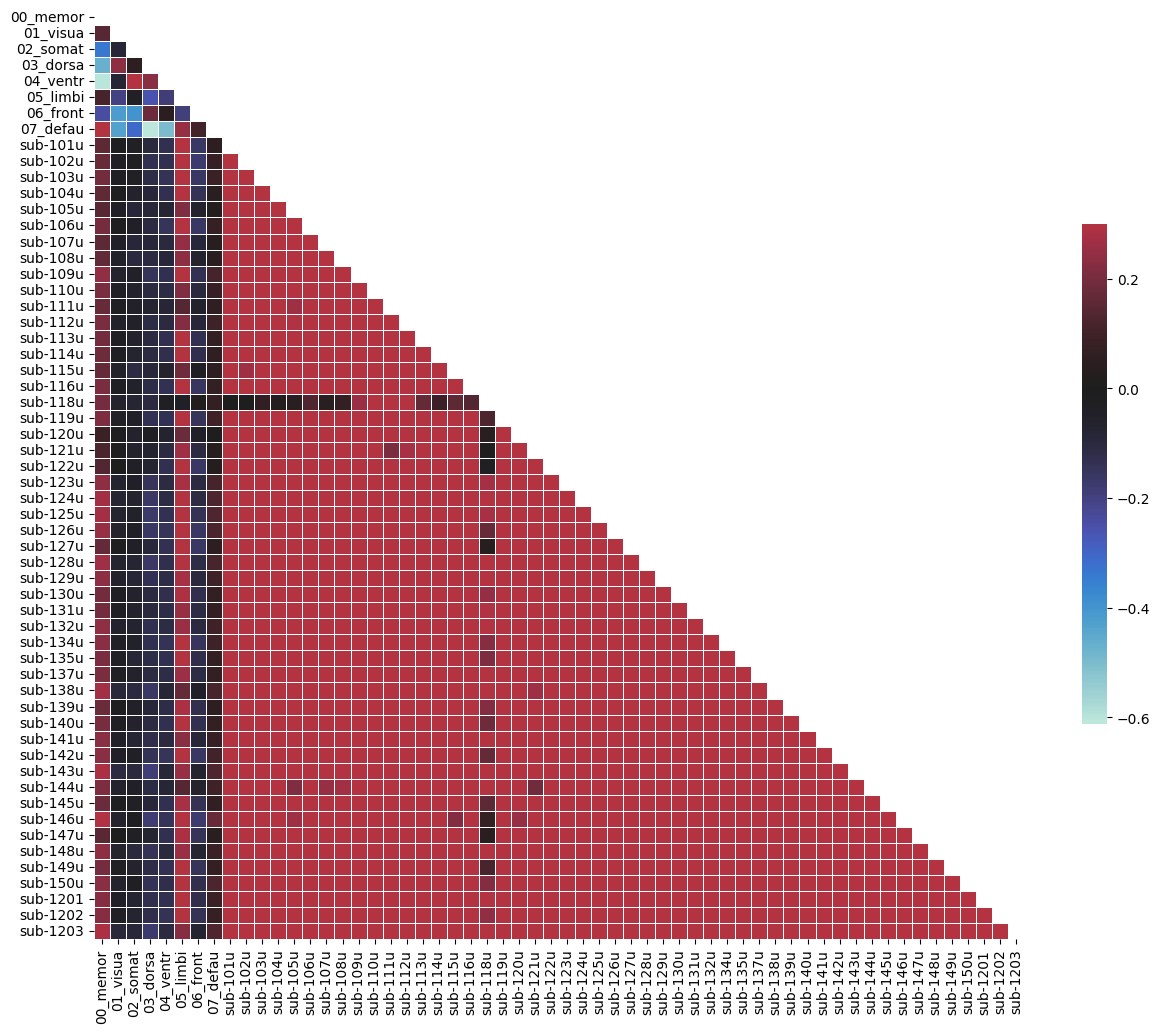

In [46]:
#Create heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(correl_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig = plt.figure(figsize=(15, 13))
sns.heatmap(correl_df, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [47]:
if os.path.exists(out_dir) != True:
    os.mkdir(out_dir)
name = os.path.basename(csv_in).split('.csv')[0] + '_corrmat.png'
fig.savefig(os.path.join(out_dir, name))
print(f'{name} saved in: {os.path.join(out_dir, name)}')

matrix_corrMx_AvgR_corrmat.png saved in: C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\figures\matrix_corrMx_AvgR_corrmat.png


In [70]:
%history 22

name_df = pd.read_csv(roi_names, names=['arb'], header=None)
name_df.tail(5)
colnames = name_df.arb.values.tolist()
newname = []
for name in colnames:
    arb = os.path.basename(name).split('.nii')[0]
    arb = arb[0:8]
    newname.append(arb)
print(newname)
